In [1]:
# Используемые библиотеки
import pandas
import math
import matplotlib.pyplot as plt
from more_itertools import chunked
from scipy.stats import norm
import numpy
from itertools import zip_longest

In [2]:
# Значения критических точек
with open("crit_table.txt") as f:
    vals_crit = list(map(lambda x: float(x), f.read().replace(",", ".").split()))
param_alpha = [0.01, 0.025, 0.05, 0.95, 0.975, 0.99]
param_k = list(range(1, 31))
def get_crit_val(a, k):
    a_index = param_alpha.index(a)
    k_index = param_k.index(k)
    return vals_crit[k_index*6 + a_index]
lst_vals_crit = list(chunked(vals_crit, 6))
df = pandas.DataFrame(map(lambda i: [param_k[i]] + lst_vals_crit[i], range(len(param_k))) , columns=['k=']+ list(map(lambda x: "a=" + str(x), param_alpha)))
df = df.set_index("k=")
df

,a=0.01,a=0.025,a=0.05,a=0.95,a=0.975,a=0.99
k=,,,,,,
1,6.6,5.0,3.8,0.0039,0.00098,0.00016
2,9.2,7.4,6.0,0.1030,0.05100,0.02000
3,11.3,9.4,7.8,0.3520,0.21600,0.11500
4,13.3,11.1,9.5,0.7110,0.48400,0.29700
5,15.1,12.8,11.1,1.1500,0.83100,0.55400
6,16.8,14.4,12.6,1.6400,1.24000,0.87200
7,18.5,16.0,14.1,2.1700,1.69000,1.24000
8,20.1,17.5,15.5,2.7300,2.18000,1.65000
9,21.7,19.0,16.9,3.3300,2.70000,2.09000


In [3]:
# Вариант 2, набор данных по фондовооруженности предприятия 100 наблюдений
with open("var.txt") as f:
    vals = list(map(lambda x: float(x), f.read().split()))
pandas.DataFrame(list(chunked(vals, 10)))

,0,1,2,3,4,5,6,7,8,9
0,18.67,12.46,18.87,11.61,23.51,11.75,16.27,16.51,14.67,16.15
1,17.88,16.85,9.06,16.35,15.97,10.10,17.78,14.52,14.56,12.59
2,18.66,14.19,13.97,15.35,12.85,13.18,18.39,17.26,14.90,15.79
3,14.43,15.39,14.85,12.48,12.97,12.04,16.26,11.74,20.78,14.27
4,15.19,14.59,19.91,9.80,12.65,15.91,11.37,18.57,20.90,12.15
5,15.42,20.42,12.70,10.98,11.74,15.91,10.67,14.21,17.50,15.98
6,11.26,17.07,18.83,17.06,12.61,8.86,18.67,17.79,11.42,15.36
7,14.95,15.55,11.27,15.41,16.29,12.44,16.50,16.74,5.21,18.03
8,12.29,10.74,11.25,14.57,13.16,15.32,18.11,11.77,11.51,13.56
9,15.74,12.44,14.62,14.97,12.21,12.06,15.60,13.27,15.16,16.99


In [4]:
# 1. Ранжировать дискретный массив данных в порядке возрастания.
vals.sort()
pandas.DataFrame(list(chunked(vals, 10)))

,0,1,2,3,4,5,6,7,8,9
0,5.21,8.86,9.06,9.80,10.10,10.67,10.74,10.98,11.25,11.26
1,11.27,11.37,11.42,11.51,11.61,11.74,11.74,11.75,11.77,12.04
2,12.06,12.15,12.21,12.29,12.44,12.44,12.46,12.48,12.59,12.61
3,12.65,12.70,12.85,12.97,13.16,13.18,13.27,13.56,13.97,14.19
4,14.21,14.27,14.43,14.52,14.56,14.57,14.59,14.62,14.67,14.85
5,14.90,14.95,14.97,15.16,15.19,15.32,15.35,15.36,15.39,15.41
6,15.42,15.55,15.60,15.74,15.79,15.91,15.91,15.97,15.98,16.15
7,16.26,16.27,16.29,16.35,16.50,16.51,16.74,16.85,16.99,17.06
8,17.07,17.26,17.50,17.78,17.79,17.88,18.03,18.11,18.39,18.57
9,18.66,18.67,18.67,18.83,18.87,19.91,20.42,20.78,20.90,23.51


In [5]:
# 2. Составить интервальный вариационный ряд по ранжированному дискретному массиву.
n = len(vals) # Количество элементов
xmin = min(vals) # Минимальное значение
xmax = max(vals) # Максимальное значение
r = round(1 + 3.3*math.log10(n)) # Количество отрезков
R = xmax - xmin # Длина всего отрезка
delta = R/r # Длина отрезка интервала
xni = [list() for _ in range(r)] # Для хранения значений входящих в интервал
start = xmin # Начало интервала
stop = start + delta # Конец интервала
ranges = [] # Отрезки
for i in range(r): # Проходим каждый отрезок
    for x in vals: # Проходим по каждому значению
       if start <= x and (x < stop or i == r - 1): # Проверяем на вхождение в отрезок
            xni[i].append(x) # Добавляем в массив значение входящего в интервал
    ranges.append([start, stop]) # Добавляем отрезок
    start = stop # Сдвигаем начало отрезка
    stop += delta # Сдвигаем конец отрезка
ni = [len(xni[i]) for i in range(r)] # Количество значений в интервале
wi = [ni[i]/n for i in range(r)] # Высчитываем относительную вероятность
hi = [(wi[i]/delta)*100 for i in range(r)] # Высчитываем высоту прямоугольника
xi = [sum(ranges[i])/2 for i in range(r)] # Вычитываем середины интервалов
xavg = sum(vals)/n # Среднее значение
xwi = [xi[i]*wi[i] for i in range(r)]
x2wi = [(xi[i]**2)*wi[i] for i in range(r)]
xmxavg3wi = [((xi[i] - xavg)**3)*wi[i] for i in range(r)]
xmxavg4wi = [((xi[i] - xavg)**4)*wi[i] for i in range(r)]
winak = [sum(wi[:i + 1]) for i in range(r)]
print("Выводим таблицу для характеристики интервала")
display(pandas.DataFrame(list(zip_longest(
    list(map(lambda x: str(round(x[0], 3)) + "-" + str(round(x[1], 3)), ranges)) + ["Сумма"],
    list(map(lambda x: round(x, 3), xi)),
    ni + [sum(ni)],
    wi + [sum(wi)],
    winak,
    list(map(lambda x: round(x, 3), xwi)) + [round(sum(xwi), 3)],
    list(map(lambda x: round(x, 3), x2wi)) + [round(sum(x2wi), 3)],
    list(map(lambda x: round(x, 3), xmxavg3wi)) + [round(sum(xmxavg3wi), 3)],
    list(map(lambda x: round(x, 3), xmxavg4wi)) + [round(sum(xmxavg4wi), 3)],
    list(map(lambda x: round(x, 3), hi)),
    fillvalue=" "
)), columns=[
    "Частичный интервал Δ=" + str(round(delta, 3)),
    "Середины интервалов, xi",
    "Абсолютные частоты ni",
    "Отн. частоты wi",
    "Накопл. отн. частоты wi^нак",
    "xi * wi",
    "(xi)^2 * wi",
    "(xi - xср)^3 * wi",
    "(xi - xср)^4 * wi",
    "Высота hi"
]))

Выводим таблицу для характеристики интервала


,Частичный интервал Δ=2.288,"Середины интервалов, xi",Абсолютные частоты ni,Отн. частоты wi,Накопл. отн. частоты wi^нак,xi * wi,(xi)^2 * wi,(xi - xср)^3 * wi,(xi - xср)^4 * wi,Высота hi
0,5.21-7.498,6.354,1,0.01,0.01,0.064,0.404,-5.795,48.318,0.437
1,7.498-9.785,8.641,2,0.02,0.03,0.173,1.493,-4.429,26.792,0.874
2,9.785-12.072,10.929,18,0.18,0.21,1.967,21.499,-9.586,36.067,7.869
3,12.072-14.36,13.216,21,0.21,0.42,2.775,36.681,-0.674,0.994,9.18
4,14.36-16.648,15.504,34,0.34,0.76,5.271,81.725,0.182,0.148,14.863
5,16.648-18.935,17.791,19,0.19,0.95,3.380,60.140,5.661,17.550,8.306
6,18.935-21.223,20.079,4,0.04,0.99,0.803,16.126,6.255,33.702,1.749
7,21.223-23.51,22.366,1,0.01,1.0,0.224,5.002,4.521,34.701,0.437
8,Сумма,,100,1.00,,14.657,223.070,-3.864,198.273,


Выводим полученную гистограмму


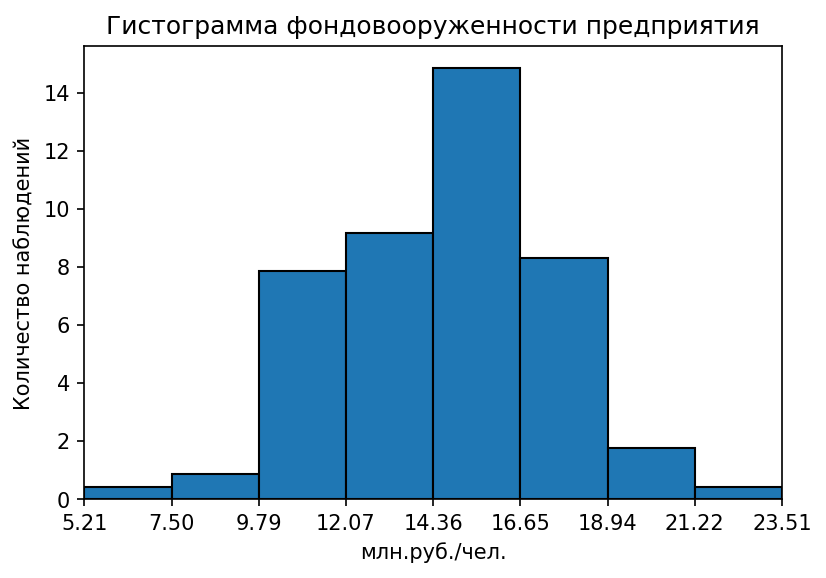

In [6]:
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.bar(xi, hi, delta, edgecolor="black")
ax.set_xlim(xmin, xmax)
ax.set_xlabel('млн.руб./чел.')
ax.set_ylabel('Количество наблюдений')
ax.set_title('Гистограмма фондовооруженности предприятия')
ax.set_xticks([xmin] + list(map(lambda x: x[1], ranges)))
#ax.set_yticks([0] + hi)
print("Выводим полученную гистограмму")

Выводим полученную эмпирическую функцию


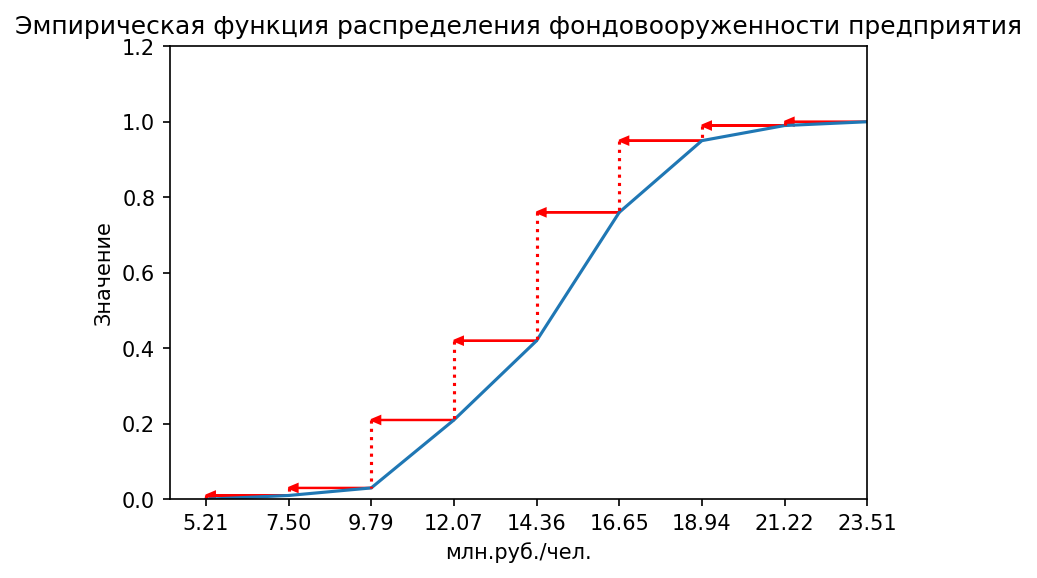

In [7]:
# Строим график эмпирической функции распределения
head_length=0.25
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.plot([xmin] + list(map(lambda x: x[1], ranges)), [0] + winak)
ax.vlines(list(map(lambda x: x[0], ranges)), list(map(lambda i: winak[i], range(r))), [0] + list(map(lambda i: winak[i], range(0, r - 1))), linestyles="dotted", color="red")
for i in range(r):
    ax.arrow(ranges[i][1], winak[i], ranges[i][0] - ranges[i][1] + head_length, 0, color="red", head_length=head_length, head_width=0.02)
ax.set_xlim(xmin-1, xmax)
ax.set_ylim(0,1.2)
ax.set_xlabel('млн.руб./чел.')
ax.set_ylabel('Значение')
ax.set_title('Эмпирическая функция распределения фондовооруженности предприятия')
ax.set_xticks([xmin] + list(map(lambda x: x[1], ranges)))
#ax.set_yticks([0] + hi)
print("Выводим полученную эмпирическую функцию")

In [8]:
# Вычисляем:
Dv = sum(map(lambda x: x**2, vals))/n - xavg**2 # выборочную дисперсию
Sv = (n/(n-1))*Dv # исправленную выборочную дисперсию
Sigmav = Sv**0.5 # выборочное среднее квадратичное отклонение
# Вычисление моды
xmo = ranges[0][0] # Возьмем начальную точку моды
fmo = wi[0] # Возьмем начальное значение относительной вероятности
imo = 0 # Возьмем начальный номер
for i in range(1, r): # Итерируем каждый интервал
    if fmo < wi[i]: # Если скачет выше чем начальное
        fmo = wi[i] # Меняем значение относительной вероятности
        xmo = ranges[i][0] # Меняем точку моды
        imo = i # Меняем номер
i = imo # Для удобства обозначим как i
Mo = xmo + delta*((ni[i] - ni[i - 1])/((ni[i] - ni[i - 1]) + (ni[i] - ni[i + 1]))) # Считаем моду
# Вычисление медианы
nme = n - math.ceil(n/2) - 1 # Считаем индекс медианы из массива 100 элементов
valme = vals[nme] # Находим значение по данному индексу в отсортированном массиве
ime = list(filter(lambda i: ranges[i][0] < valme and valme < ranges[i][1], range(r)))[0] # Ищем индекс интервала
xme = ranges[ime][0] # Забираем точку начала медианы
Me = xme + delta*((n/2 - sum(ni[:ime]))/(ni[ime])) # Считаем медиану
asim = sum(xmxavg3wi)/Sigmav**3
exces = sum(xmxavg4wi)/Sigmav**4 - 3
display(pandas.DataFrame([[
    Dv, Sv, Sigmav, Mo, Me, asim, exces
]], columns=["Выборочная дисперсия",
"Исправленная выборочная дисперсия",
"Выборочное среднее квадратичное отклонение",
"Мода",
"Медиана",
"Ассиметрия",
"Эксцесс"]))

,Выборочная дисперсия,Исправленная выборочная дисперсия,Выборочное среднее квадратичное отклонение,Мода,Медиана,Ассиметрия,Эксцесс
0,8.910818,9.000826,3.000138,15.422054,14.898235,-0.143079,-0.552631


In [9]:
# Ищем доверительный интервал
t = 1.96
delt = (t*Sigmav)/(n**0.5)
dov_interv = (xavg - delt, xavg + delt)
print("Доверительный интервал =", dov_interv)

Доверительный интервал = (14.103073016302648, 15.27912698369735)


In [10]:
# Расчитываем теоритические частоты
zi = [float("-inf")] + [(ranges[i][0] - xavg)/Sigmav for i in range(1, r)] + [float("+inf")]
laplasf = norm.cdf
f = [-1/2 + laplasf(zi[i]) for i in range(r + 1)]
delta_f = [f[i + 1] - f[i] for i in range(r)]
ni_t = [delta_f[i]*n for i in range(r)]
display(
    pandas.DataFrame(
        zip_longest(
            list(map(lambda x: round(x[0], 3), ranges)),
            list(map(lambda x: round(x[1], 3), ranges)),
            zi[:-1],
            zi[1:],
            f[:-1],
            f[1:] + ["Сумма"],
            delta_f + [sum(delta_f)],
            ni_t + [sum(ni_t)],
            fillvalue=" "
        ),
        columns=["xi", "xi+1", "zi", "zi+1", "fzi", "fzi+1", "dfzi", "ni"]
    )
)

,xi,xi+1,zi,zi+1,fzi,fzi+1,dfzi,ni
0,5.21,7.498,-inf,-2.397757,-0.5,-0.491752,0.008248,0.824791
1,7.498,9.785,-2.397757,-1.635292,-0.491752,-0.449006,0.042746,4.274605
2,9.785,12.072,-1.635292,-0.872827,-0.449006,-0.308621,0.140385,14.038483
3,12.072,14.36,-0.872827,-0.110362,-0.308621,-0.043939,0.264683,26.468251
4,14.36,16.648,-0.110362,0.652103,-0.043939,0.242833,0.286771,28.677147
5,16.648,18.935,0.652103,1.414568,0.242833,0.421402,0.178570,17.856970
6,18.935,21.223,1.414568,2.177033,0.421402,0.485261,0.063859,6.385850
7,21.223,23.51,2.177033,inf,0.485261,0.5,0.014739,1.473904
8,,,,,,Сумма,1.000000,100.000000


In [11]:
def joining(ni, ni_t):
    rni = []
    rni_t = []
    for i in range(r):
        if len(rni) > 0 and rni[-1] < 5:
            rni[-1] += ni[i]
            rni_t[-1] += ni_t[i]
        else:
            rni.append(ni[i])
            rni_t.append(ni_t[i])
    return rni, rni_t

vni, vni_t = joining(ni, ni_t)
n_n = len(vni)
vni_m_vni_t = [vni_t[i] - vni[i] for i in range(n_n)]
vni_m_vni_t2 = [vni_m_vni_t[i]**2 for i in range(n_n)]
vni_m_vni_t2_d_vni = [vni_m_vni_t2[i]/vni[i] for i in range(n_n)]
display( 
    pandas.DataFrame(
        zip_longest(
            [" "]*5 + ["Сумма"],
            vni + [sum(vni)],
            vni_t + [sum(vni_t)],
            vni_m_vni_t,
            vni_m_vni_t2,
            vni_m_vni_t2_d_vni + [sum(vni_m_vni_t2_d_vni)],
            fillvalue=" "
        ),
        columns=[" ", "ni*", "ni", "ni - ni*", "(ni - ni*)^2", "((ni - ni*)^2)/ni"]
    )
)
xnabl = sum(vni_m_vni_t2_d_vni)
xcrit = get_crit_val(0.05, n_n - 3)
print("x наблюдаемая =", xnabl)
print("x критическая =", xcrit)
print("s =", n_n)
if xnabl < xcrit:
    print("Гипотеза H0 о нормальном распределении принимается")
else:
    print("Гипотеза H0 о нормальном распределении не принимается")

,,ni*,ni,ni - ni*,(ni - ni*)^2,((ni - ni*)^2)/ni
0,,21,19.137880,-1.86212,3.467492,0.165119
1,,21,26.468251,5.468251,29.901765,1.423894
2,,34,28.677147,-5.322853,28.332769,0.833317
3,,19,17.856970,-1.14303,1.306519,0.068764
4,,5,7.859754,2.859754,8.178191,1.635638
5,Сумма,100,100.000000,,,4.126731


x наблюдаемая = 4.126731371243145
x критическая = 6.0
s = 5
Гипотеза H0 о нормальном распределении принимается


In [12]:
# Проверка того что мы правильно посчитали среднеквадратичное отклонение
# по правилу 3 сигм
# Должно удовлетворять условие что значение будет около 99.72%
from collections import Counter
xmin_v = xavg - 3*Sigmav
xmax_v = xavg + 3*Sigmav
cntr = Counter(map(lambda x: x <= xmax_v and x >= xmin_v, vals))
str(100*cntr[True]/n)+"%"

'99.0%'

Наглядно рассмотрим гистограмму и нормальное распределение
Границы по правилу 3 сигм красным цветом вертикальные линии
Границы доверительного интервала голубым цветом вертикальные линии


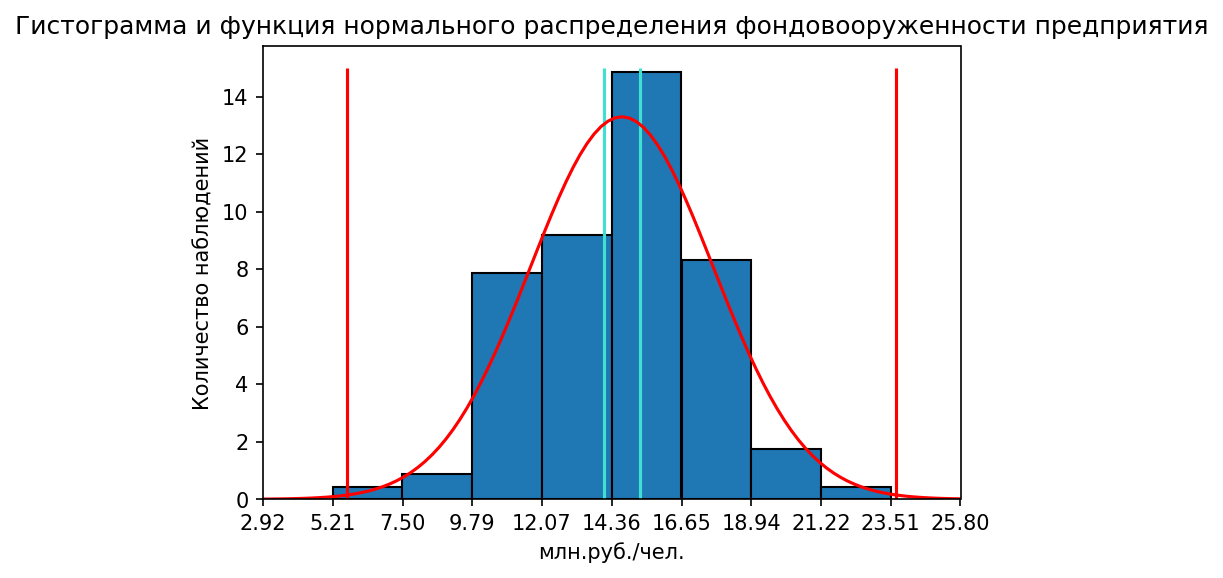

In [13]:
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.bar(xi, hi, delta, edgecolor="black")
ax.vlines([xavg - 3*Sigmav, xavg + 3*Sigmav], 0, 15, color="red")
ax.vlines(dov_interv, 0, 15, color="turquoise")
xgraph = numpy.linspace(xmin - delta, xmax + delta, 100)
ax.plot(xgraph, norm.pdf(xgraph, xavg, Sigmav)*sum(hi)*delta, color='red')
ax.set_xlim(xmin - delta, xmax + delta)
ax.set_xlabel('млн.руб./чел.')
ax.set_ylabel('Количество наблюдений')
ax.set_title('Гистограмма и функция нормального распределения фондовооруженности предприятия')
ax.set_xticks([xmin - delta] + [xmin] + list(map(lambda x: x[1], ranges)) + [xmax + delta])
#ax.set_yticks([0] + hi)
print("Наглядно рассмотрим гистограмму и нормальное распределение")
print("Границы по правилу 3 сигм красным цветом вертикальные линии")
print("Границы доверительного интервала голубым цветом вертикальные линии")